In [179]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


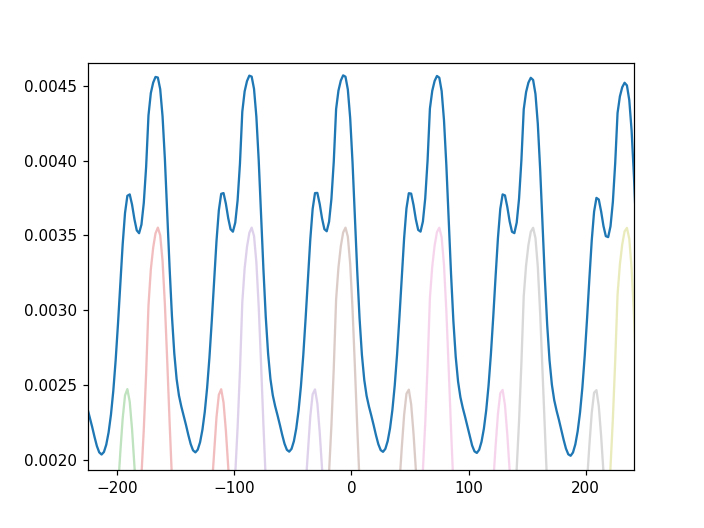

In [182]:
order = 10
beta_0 = 1.8
deltas = np.linspace(-1000, 1000, 1000)
gamma = 25
trap_freq = 48.5


def spectrum(deltas, gamma, trap_freq, beta_0, order, offset):
    P = np.zeros(len(deltas))
    y_values = []
    beta_values = []
    for detuning in deltas:
        tmp = 0
        if (detuning - offset) <=-gamma/2:
            beta = 0.3
        else:
            beta = (1-(gamma/2)/(detuning - offset + gamma))*beta_0 + 0.3
        beta_values.append(beta)
        for n in range(-1*order, order):
            tmp += scipy.special.jn(n,beta)**2 / ((detuning - offset + n*trap_freq)**2 + (gamma/2)**2)
        y_values.append(tmp)
    return y_values
Y_array = []
for i in range(-5,5):
    y_values = spectrum(deltas, gamma, trap_freq, beta_0, order, i*80)
    Y_array.append(y_values)
    plt.plot(deltas, y_values, alpha = 0.3)
tot_y = np.zeros(1000)
for array in Y_array:
    tot_y += array
plt.plot(deltas, tot_y)

<IPython.core.display.Javascript object>


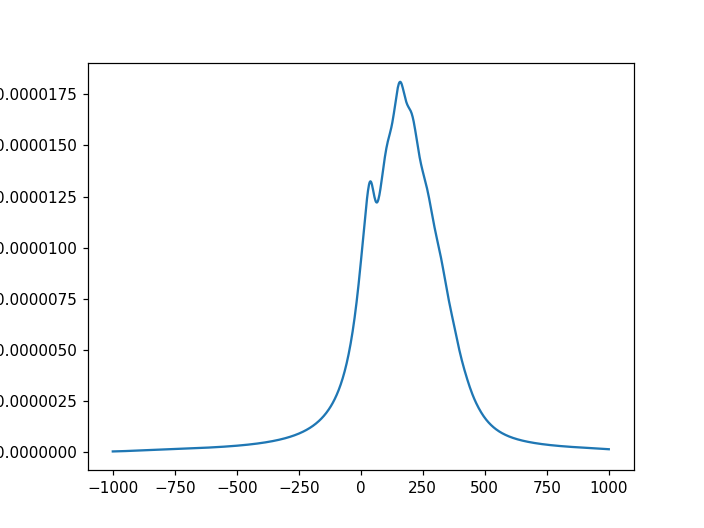

In [146]:
con = np.convolve(Y_array[0], Y_array[1], 'same')
plt.plot(deltas, con)

In [4]:
import scipy

<IPython.core.display.Javascript object>


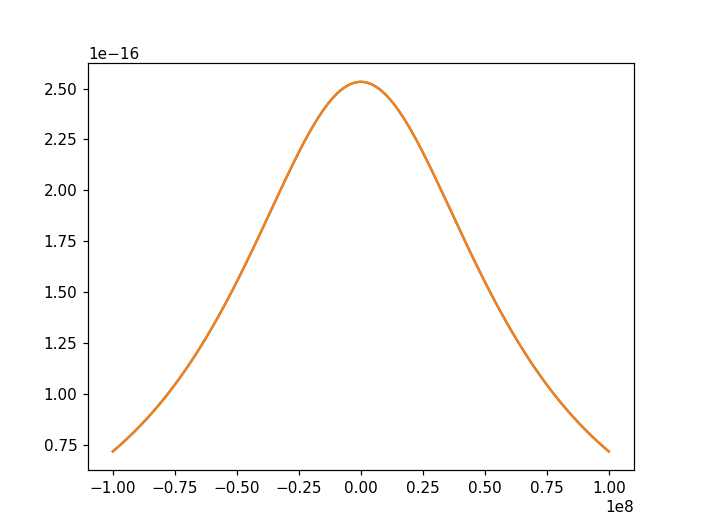